In [2]:
OUTDATED_IGNORE=1

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import os, pickle
import pingouin as pg
from sklearn.metrics import median_absolute_error, r2_score

/volatile/miniconda3/envs/ohbm/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [3]:
df = pd.read_csv('../../DerivedData/cohortA_subjects_clinical.csv', index_col=0)

with open('../../DerivedData/cohorts_subjects_list.pickle', 'rb') as handle:
    cohorts = pickle.load(handle)
    
df = df[df.subject_id.isin(cohorts['A'])]

In [20]:
xx = df['Cognitive Score'].values
yy = df['Cognitive Score'].values

corr = 0.7
means = [xx.mean(), xx.mean()]  
stds = [yy.std() , yy.std()]

covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 


m = np.random.multivariate_normal(means, covs, 1000).T 
pg.corr(m[0], m[1])['r'][0]

0.6969412182233847

In [21]:
xx = df['Cognitive Score'].values
yy = np.random.normal(xx.mean(),1,len(xx))

corr = 0.7
means = [xx.mean(), xx.mean()]  
stds = [yy.std() , yy.std()]

covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 


m = np.random.multivariate_normal(means, covs, 1000).T 
pg.corr(m[0], m[1])['r'][0]

0.6982574919066382

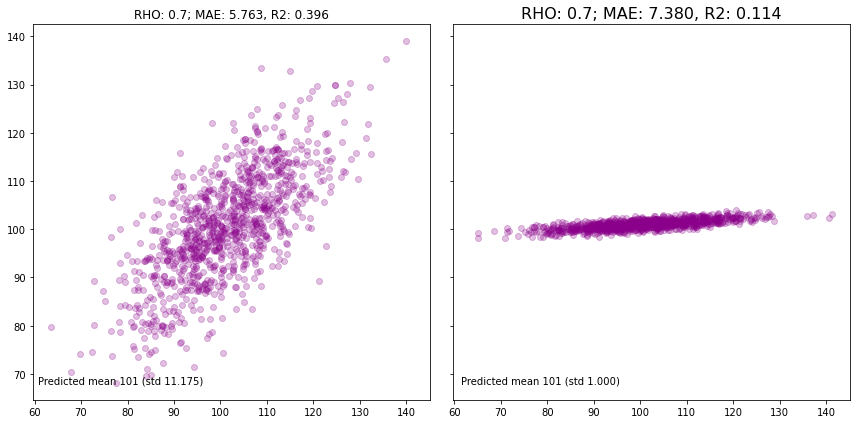

In [24]:
fig, ax = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)

corr = 0.7

## 1st example 
xx = df['Cognitive Score'].values
yy = df['Cognitive Score'].values

corr = 0.7
means = [xx.mean(), xx.mean()]  
stds = [yy.std() , yy.std()]

covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 


m = np.random.multivariate_normal(means, covs, 1000).T 
pg.corr(m[0], m[1])['r'][0]
ax[0].scatter(m[0], m[1], c='darkmagenta', alpha=0.25)
mae = median_absolute_error(m[0], m[1])
r2 = r2_score(m[0], m[1])
rho = pg.corr(m[0], m[1])['r'][0]
ax[0].set_title('RHO: {}; MAE: {:.3f}, R2: {:.3f}'.format(corr, mae, r2))
ax[0].text(0.22, 0.05, 'Predicted mean {:.0f} (std {:.3f})'.format(means[1], stds[1]),
           horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)


## 2nd example 

corr = 0.7
means = [xx.mean(), xx.mean()]  
stds = [xx.std() , 1]

covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 


m = np.random.multivariate_normal(means, covs, 1000).T 
pg.corr(m[0], m[1])['r'][0]
ax[1].scatter(m[0], m[1], c='darkmagenta', alpha=0.25)
mae = median_absolute_error(m[0], m[1])
r2 = r2_score(m[0], m[1])
ax[1].set_title('RHO: {}; MAE: {:.3f}, R2: {:.3f}'.format(corr, mae, r2), fontsize=16)
ax[1].text(0.22, 0.05, 'Predicted mean {:.0f} (std {:.3f})'.format(means[1], stds[1]),
           horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

In [37]:
corr = []
p = []
for it in range(1000):

    a = df['Cognitive Score'].values
    b = np.random.normal(xx.mean(),1,len(a))

    corr.append(pg.corr(a,b)['r'][0].astype(np.float32))
    p.append(pg.corr(a,b)['p-val'][0].astype(np.float32))

In [42]:
p = np.array(p).astype(np.float32)
len(p[p<0.05])

42